<a href="https://colab.research.google.com/github/dasigiraghu96/Deeplearning_Computer_Vision/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.4.1'

In [3]:
tf.test.gpu_device_name

<function tensorflow.python.framework.test_util.gpu_device_name>

In [4]:
!nvidia-smi

Sun Mar 14 09:13:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [6]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config=ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction=0.5
config.gpu_options.allow_growth=True
session=InteractiveSession(config=config)

In [7]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [8]:
Image_size=[224,224]
train_path='/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/train'
valid_path='/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/validation'

In [9]:
#VGG16 data preprocessing
#input_shape=rgb channel add [3]
#take weights from imagenet competetion
#include_top=False will remove flatten,fully connected layer,output layer used in imagenet competetion
#here we need only 2 classes
#input layer will also be skipped,by specifying input shape we are specifying our own input shape for our data
vgg16=VGG16(input_shape=Image_size+[3],weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [10]:
VGG16().summary()

553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [11]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
#don't train existing weights
for layer in vgg16.layers:
  layer.trainable=False 

In [13]:
folders=glob('/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/train/*')
folders

['/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs',
 '/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats']

In [14]:
x=Flatten()(vgg16.output)

In [15]:
prediction=Dense(len(folders),activation='softmax')(x)

In [16]:
model=Model(inputs=vgg16.input,outputs=prediction)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [19]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [21]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 2 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
63/63 [==============================] - 639s 10s/step - loss: 0.8969 - accuracy: 0.6903 - val_loss: 0.2467 - val_accuracy: 0.8970
Epoch 2/50
63/63 [==============================] - 32s 505ms/step - loss: 0.2273 - accuracy: 0.9095 - val_loss: 0.2326 - val_accuracy: 0.9020
Epoch 3/50
63/63 [==============================] - 32s 506ms/step - loss: 0.1804 - accuracy: 0.9306 - val_loss: 0.2045 - val_accuracy: 0.9160
Epoch 4/50
63/63 [==============================] - 32s 501ms/step - loss: 0.1594 - accuracy: 0.9344 - val_loss: 0.1969 - val_accuracy: 0.9290
Epoch 5/50
63/63 [==============================] - 32s 501ms/step - loss: 0.1141 - accuracy: 0.9565 - val_loss: 0.2341 - val_accuracy: 0.8980
Epoch 6/50
63/63 [==============================] - 31s 497ms/step - loss: 0.1310 - accuracy: 0.9485 - val_loss: 0.2150 - val_accuracy: 0.9120
Epoch 7/50
63/63 [==============================] - 31s 498ms/step - loss: 0.1045 - accuracy: 0.9598 - val_loss: 0.1885 - val_accuracy: 0.9270


In [23]:
from keras.models import load_model
model.save('/content/drive/MyDrive/cats_and_dogs_filtered/VGG16.h5')
model=load_model('/content/drive/MyDrive/cats_and_dogs_filtered/VGG16.h5')


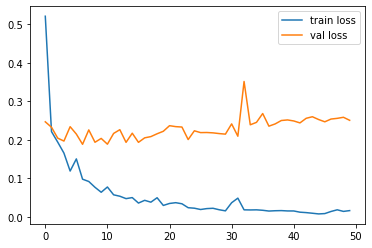

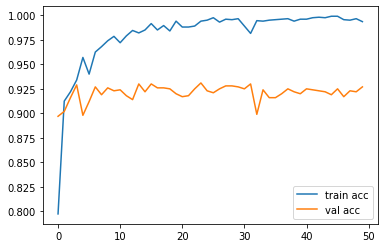

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs/dog.2002.jpg', 
                            target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [28]:
result

array([[0.00229704, 0.997703  ]], dtype=float32)

In [29]:
a=np.argmax(result, axis=1) #returns indices of maximum values
if a==0:
  print('The image is classified as Cat')
else:
  print('The image is classified as dog')

The image is classified as dog
